In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

NameError: name 'to_categorical' is not defined

A CNN uses a series of layers to progressively learn more complex features.          

1.Convolutional Layer: Finds patterns like edges and shapes.

2.Pooling Layer: Reduces the size of the image, helping to generalize features.

3.Flatten Layer: Converts the 2D data to a 1D vectors.

4.Dense Layers : Classifies the flattened features.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train_one_hot,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9641 - loss: 0.1172 - val_accuracy: 0.9757 - val_loss: 0.0881
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9693 - loss: 0.0999 - val_accuracy: 0.9765 - val_loss: 0.0825
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9729 - loss: 0.0878 - val_accuracy: 0.9748 - val_loss: 0.0924
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.9751 - loss: 0.0792 - val_accuracy: 0.9798 - val_loss: 0.0750
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9781 - loss: 0.0708 - val_accuracy: 0.9835 - val_loss: 0.0671


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose = 2)
print("\nTest accuracy:", test_acc)
print("\nTest Loss:", test_loss)

313/313 - 3s - 8ms/step - accuracy: 0.9802 - loss: 0.0621

Test accuracy: 0.9801999926567078

Test Loss: 0.062132012099027634


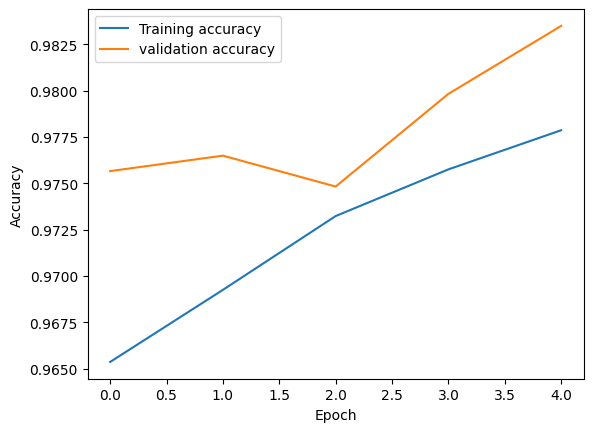

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True Label: 7
Predicted Label: 7


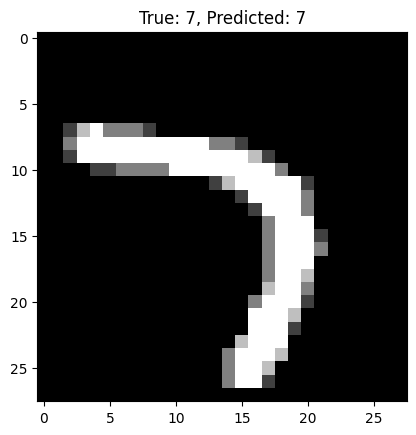

In [ ]:
index = 60
sample_image = x_test[index]
sample_label = y_test[index]
sample_image_expanded = np.expand_dims(sample_image, axis=0)
prediction = model.predict(sample_image_expanded)
predicted_class = np.argmax(prediction)
print("True Label:", sample_label)
print("Predicted Label:", predicted_class)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True: {sample_label}, Predicted: {predicted_class}")
plt.show()